In [ ]:
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

In [ ]:
from mshr import *
from fenics import *

import imageio
import numpy as np
import matplotlib
import matplotlib.tri as tri
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 18})

In [ ]:
def solutionAndErrors(V, givenFunction, alpha, f, h, g):

    def boundary(x, on_boundary):
        return on_boundary and x[0] < 0

    bc = DirichletBC(V, h, boundary)

    u = TrialFunction(V)
    v = TestFunction(V)
    
    a = (dot(grad(u), grad(v)) + alpha * u * v) * dx
    L = f * v * dx + g * v * ds

    u = Function(V)
    solve(a == L, u, bc)

    error_L2 = errornorm(givenFunction, u, 'L2')

    vertex_values_givenFunction = givenFunction.compute_vertex_values(mesh)
    vertex_values_u = u.compute_vertex_values(mesh)
    error_max = np.max(np.abs(vertex_values_givenFunction - vertex_values_u))
    
    print('error_L2 = ', error_L2)
    print('error_max = ', error_max)
    
    return u

In [ ]:
def visualization(mesh, u):
    n = mesh.num_vertices()
    d = mesh.geometry().dim()
    mesh_coordinates = mesh.coordinates().reshape((n, d))
    triangles = np.asarray([cell.entities(0) for cell in cells(mesh)])
    triangulation = tri.Triangulation(mesh_coordinates[:, 0], mesh_coordinates[:, 1], triangles)
    
    plt.figure(figsize = (12, 10))
    zfaces = np.asarray([u(cell.midpoint()) for cell in cells(mesh)])
    plt.tripcolor(triangulation, facecolors = zfaces, edgecolors='k', cmap='jet')
    plt.grid()
    plt.colorbar()
    plt.plot()


def timeVisualization(mesh, i, u, min, max, hide):
    n = mesh.num_vertices()
    d = mesh.geometry().dim()
    mesh_coordinates = mesh.coordinates().reshape((n, d))
    triangles = np.asarray([cell.entities(0) for cell in cells(mesh)])
    triangulation = tri.Triangulation(mesh_coordinates[:, 0], mesh_coordinates[:, 1], triangles)

    fig = plt.figure(figsize = (12, 10))
    zfaces = np.asarray([u(cell.midpoint()) for cell in cells(mesh)])
    plt.tripcolor(triangulation, facecolors = zfaces, edgecolors='k', cmap = 'jet')
    plt.grid()
    
    plt.clim(min, max)
    bounds = np.linspace(min, max, 10)

    plt.colorbar(ticks=bounds, boundaries = bounds)
    plt.plot()

    plt.savefig(f"{i}.png", bbox_inches = "tight")
    if hide: plt.close()

In [ ]:
def differenceVisualization(mesh, u1, u2):
    n = mesh.num_vertices()
    d = mesh.geometry().dim()
    mesh_coordinates = mesh.coordinates().reshape((n, d))
    triangles = np.asarray([cell.entities(0) for cell in cells(mesh)])
    triangulation = tri.Triangulation(mesh_coordinates[:, 0], mesh_coordinates[:, 1], triangles)
    
    plt.figure(figsize = (12, 10))
    zfaces = np.asarray([np.abs(u1(cell.midpoint()) - u2(cell.midpoint())) for cell in cells(mesh)])
    plt.tripcolor(triangulation, facecolors = zfaces, edgecolors='k', cmap='jet')
    plt.grid()
    plt.colorbar()
    plt.plot()

**PART 1**

$$Test\ 1:\ u=r sin(\varphi)+1,\ R=1,\ \alpha=1$$

In [ ]:
r = Expression("sqrt(x[0] * x[0] + x[1] * x[1])", degree = 2)
phi = Expression("atan2(x[1], x[0])", degree = 2)

R = 1
alpha = Constant(1)

domain = Circle(Point(0, 0), R)
mesh = generate_mesh(domain, 50)
V = FunctionSpace(mesh, 'P', 2)

givenFunction = Expression("r * sin(phi) + 1", r = r, phi = phi, degree = 2)
f = Expression("alpha * r * sin(phi) + alpha", alpha = alpha, r = r, phi = phi, degree = 2)
h = Expression("1 * sin(phi) + 1", phi = phi, degree = 2)
g = Expression("sin(phi)", phi = phi, degree = 2)

u = solutionAndErrors(V, givenFunction, alpha, f, h, g)

error_L2 =  9.897089529573193e-05
error_max =  0.0002001862372613683


FEM Solution of Test 1


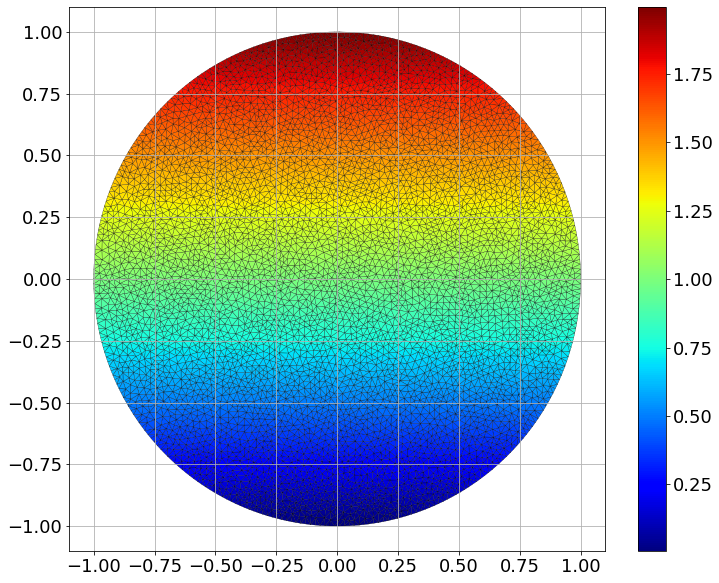

In [ ]:
print("FEM Solution of Test 1")
visualization(mesh, u)

Exact Solution of Test 1


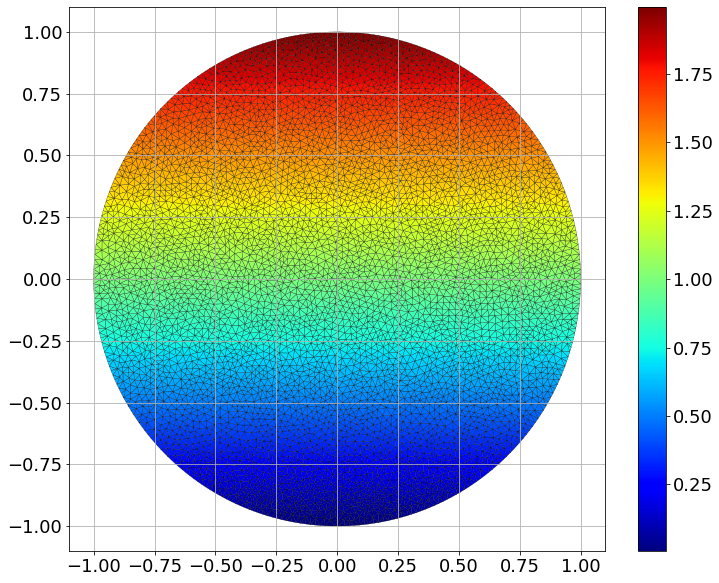

In [ ]:
print("Exact Solution of Test 1")
visualization(mesh, givenFunction)

$$Test\ 2:\ u=r^3 cos(2\varphi)+r^2 sin(\varphi),\ R=1,\ \alpha=1$$

In [ ]:
r = Expression("sqrt(x[0] * x[0] + x[1] * x[1])", degree = 2)
phi = Expression("atan2(x[1], x[0])", degree = 2)

R = 1
alpha = Constant(1)

domain = Circle(Point(0, 0), R)
mesh = generate_mesh(domain, 50)
V = FunctionSpace(mesh, 'P', 2)

givenFunction = Expression("r * r * r * cos(2*phi)+r*r*sin(phi)", r = r, phi = phi, degree = 2)
f = Expression("-9*r*cos(2*phi)+4*r*cos(2*phi)+sin(phi)+alpha*r * r * r * cos(2*phi)+alpha*r*r*sin(phi)", alpha = alpha, r = r, phi = phi, degree = 2)
h = Expression("cos(2*phi)+sin(phi)", phi = phi, degree = 2)
g = Expression("3*cos(2*phi)+2*sin(phi)", phi = phi, degree = 2)

u = solutionAndErrors(V, givenFunction, alpha, f, h, g)

error_L2 =  0.5450933186129292
error_max =  0.5786539202119292


FEM Solution of Test 2


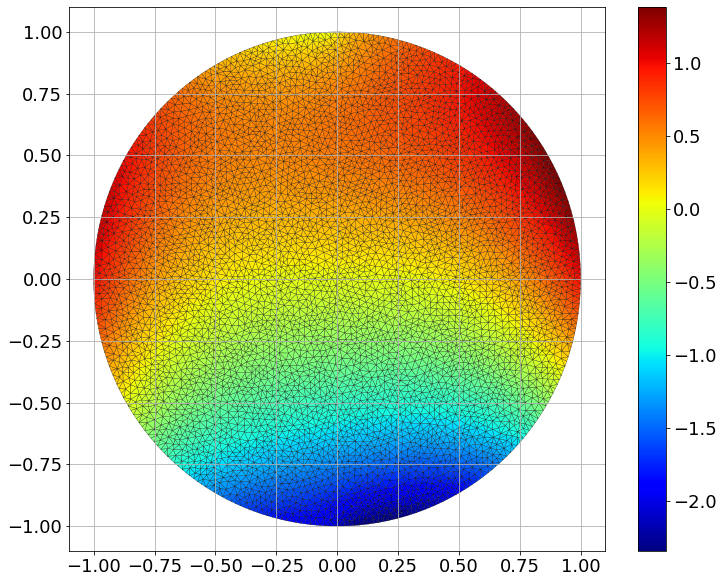

In [ ]:
print("FEM Solution of Test 2")
visualization(mesh, u)

Exact Solution of Test 2


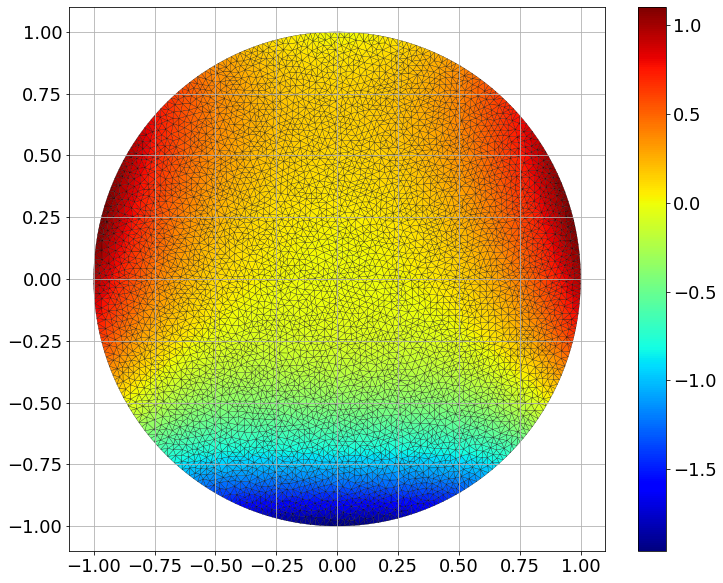

In [ ]:
print("Exact Solution of Test 2")
visualization(mesh, givenFunction)

$$Test\ 3:\ u=r^4 sin(3\varphi) cos(2\varphi),\ R=1,\ \alpha=1$$

In [ ]:
r = Expression("sqrt(x[0] * x[0] + x[1] * x[1])", degree = 2)
phi = Expression("atan2(x[1], x[0])", degree = 2)

R = 1
alpha = Constant(1)

domain = Circle(Point(0, 0), R)
mesh = generate_mesh(domain, 50)
V = FunctionSpace(mesh, 'P', 2)

givenFunction = Expression("pow(r,4)* sin(3*phi)*cos(2*phi)", r = r, phi = phi, degree = 2)
f = Expression("alpha*pow(r,4)* sin(3*phi)*cos(2*phi)-16*r*r*sin(3*phi)*cos(2*phi)+r*r*12*sin(2*phi)*cos(3*phi)+r*r*13*sin(3*phi)*cos(2*phi)", alpha = alpha, r = r, phi = phi, degree = 2)
h = Expression("sin(3*phi)*cos(2*phi)", phi = phi, degree = 2)
g = Expression("4*sin(3*phi)*cos(2*phi)", phi = phi, degree = 2)

u = solutionAndErrors(V, givenFunction, alpha, f, h, g)

error_L2 =  0.0004000260037791878
error_max =  0.0008000238120629


FEM Solution of Test 3


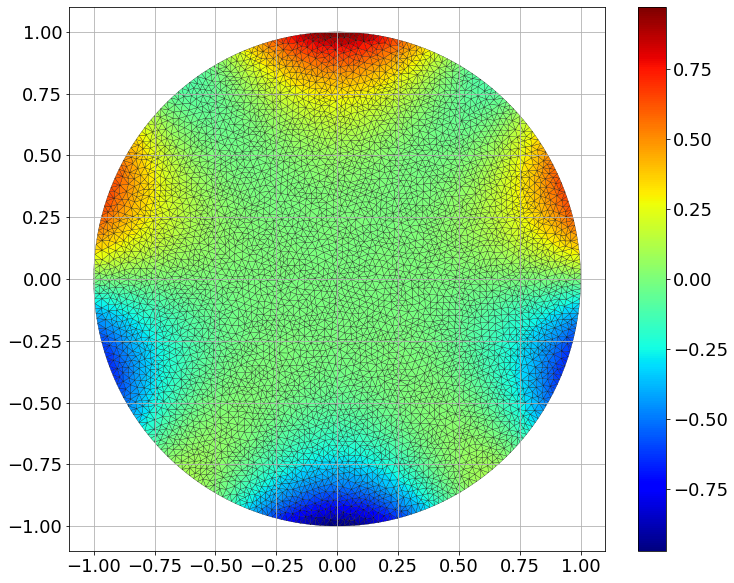

In [ ]:
print("FEM Solution of Test 3")
visualization(mesh, u)

Exact Solution of Test 3


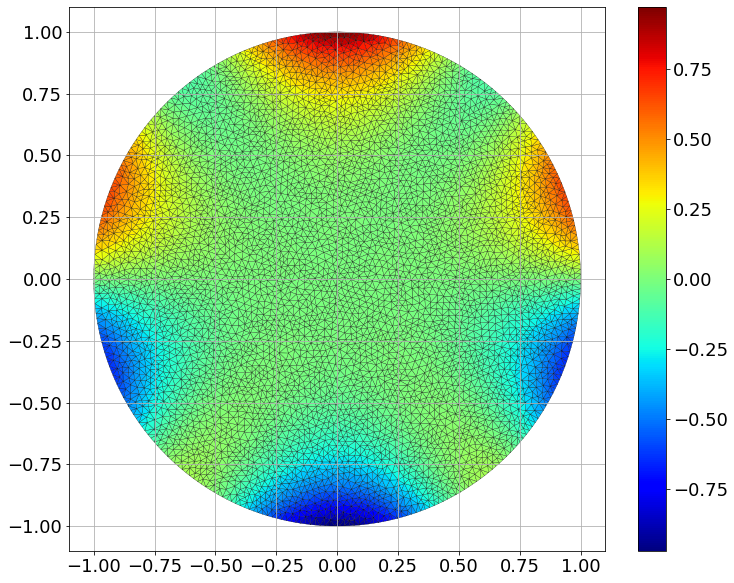

In [ ]:
print("Exact Solution of Test 3")
visualization(mesh, givenFunction)

_________________________________________________

**PART 2**

$$Test\ 1:\ u=trcos(\varphi)+1,\ R=1,\ \alpha=1$$

error_L2 =  1.5067350905527403e-05
error_max =  4.003925142948006e-05
error_L2 =  3.27704836228893e-05
error_max =  8.007850285896012e-05
error_L2 =  5.136590723910343e-05
error_max =  0.00012011775428844018
error_L2 =  7.029682707599499e-05
error_max =  0.00016015700571792024
error_L2 =  8.93627555924281e-05
error_max =  0.0002001962571474003
error_L2 =  0.00010848807534689606
error_max =  0.00024023550857688036
error_L2 =  0.00012764292533490472
error_max =  0.0002802747600063604
error_L2 =  0.0001468146684131
error_max =  0.0003203140114358405
error_L2 =  0.0001659973706621124
error_max =  0.00036035326286532054
error_L2 =  0.00018518785192215542
error_max =  0.0004003925142948006


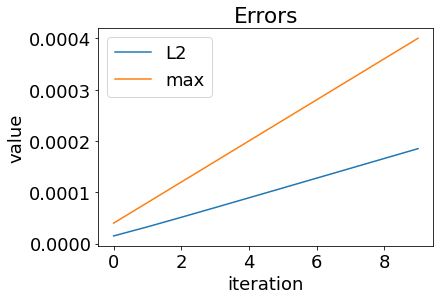

In [47]:
L2_errors = []
max_errors = []

R = 1
equationParameterA = Constant(1)

T = 2.0
timeGridSteps = 10
timeStep = T / timeGridSteps

domain = Circle(Point(0, 0), R)
mesh = generate_mesh(domain, 50)
V = FunctionSpace(mesh, 'P', 2)

r = Expression("sqrt(x[0] * x[0] + x[1] * x[1])", degree = 2)
phi = Expression("atan2(x[1], x[0])", degree = 2)

t = 0
givenFunction = Expression("t * r * cos(phi) + 1", t = t, r = r, phi = phi, degree = 2)
f = Expression("r * cos(phi)", t = t, r = r, phi = phi, degree = 2)
h = Expression("t * cos(phi) + 1", t = t, phi = phi, degree = 2)
g = Expression("t * cos(phi)", t = t, phi = phi, degree = 2)

givenFunctions = [Expression("t * r * cos(phi) + 1", t = t, r = r, phi = phi, degree = 2)]

discreteU = interpolate(h, V)
FEMSolutions = [discreteU.copy()]

for n in range(timeGridSteps):
    t += timeStep
    givenFunction.t = t
    f.t = t
    h.t = t
    g.t = t
    
    u = solutionAndErrors(V, givenFunction, 1.0 / (timeStep * equationParameterA), discreteU / (timeStep * equationParameterA) + f / equationParameterA, h, g) 
    discreteU.assign(u)
    FEMSolutions.append(discreteU.copy())
    givenFunctions.append(Expression("t * r * cos(phi) + 1", t = t, r = r, phi = phi, degree = 2)) 

    L2_errors.append(errornorm(givenFunction, u, 'L2'))
    
    vertex_values_givenFunction = givenFunction.compute_vertex_values(mesh)
    vertex_values_u = u.compute_vertex_values(mesh)
    error_max = np.max(np.abs(vertex_values_givenFunction - vertex_values_u))
    max_errors.append(error_max)

# Graph for FEM solution
max = 0
min = 100

for i, u in enumerate(FEMSolutions): 
        n = mesh.num_vertices()
        d = mesh.geometry().dim()
        mesh_coordinates = mesh.coordinates().reshape((n, d))
        zfaces = np.asarray([u(cell.midpoint()) for cell in cells(mesh)])
        
        minimum = np.amin(zfaces)
        maximum = np.amax(zfaces)
        if (minimum < min):
            min = minimum
        if (maximum > max):
            max = maximum

for i in range(timeGridSteps):
    timeVisualization(mesh, i, FEMSolutions[i], min, max, True)

with imageio.get_writer("FEM_1.gif", mode = 'i', duration = 0.3) as writer:
    for i in range(timeGridSteps):
        image = imageio.imread(f"{i}.png")
        writer.append_data(image)

# Graph for given function       
max = 0
min = 100

for i, u in enumerate(givenFunctions): 
        n = mesh.num_vertices()
        d = mesh.geometry().dim()
        mesh_coordinates = mesh.coordinates().reshape((n, d))
        zfaces = np.asarray([u(cell.midpoint()) for cell in cells(mesh)])
        
        minimum = np.amin(zfaces)
        maximum = np.amax(zfaces)
        if (minimum < min):
            min = minimum
        if (maximum > max):
            max = maximum       

for i in range(timeGridSteps):
    timeVisualization(mesh, i, givenFunctions[i], min, max, True)

with imageio.get_writer("Given_1.gif", mode = 'i', duration = 0.3) as writer:
    for i in range(timeGridSteps):
        image = imageio.imread(f"{i}.png")
        writer.append_data(image)

# Error graphs
plt.title("Errors")
plt.plot(L2_errors, label='L2')
plt.plot(max_errors, label='max')
plt.xlabel("iteration")
plt.ylabel("value")
plt.legend()

$$Test\ 2:\ u=r^3 cos(2\varphi)+sin(t),\ R=1,\ \alpha=1$$

error_L2 =  0.0976788237391792
error_max =  0.11262655668118371
error_L2 =  0.03854104253883587
error_max =  0.04386937191242857
error_L2 =  0.07714868569828986
error_max =  0.10429042101720876
error_L2 =  0.09717263925783517
error_max =  0.1386707278559023
error_L2 =  0.11329389372829807
error_max =  0.16272304457340958
error_L2 =  0.1278870171475531
error_max =  0.18166123498826048
error_L2 =  0.14081911376153744
error_max =  0.19710406097335098
error_L2 =  0.151605474185055
error_max =  0.2094425776611306
error_L2 =  0.15983306715554116
error_max =  0.21872488915463095
error_L2 =  0.16522711977811538
error_max =  0.22490856730530107


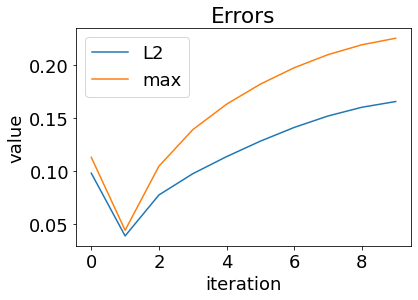

In [48]:
L2_errors = []
max_errors = []

R = 1
equationParameterA = Constant(1)

T = 2.0
timeGridSteps = 10
timeStep = T / timeGridSteps

domain = Circle(Point(0, 0), R)
mesh = generate_mesh(domain, 50)
V = FunctionSpace(mesh, 'P', 2)

r = Expression("sqrt(x[0] * x[0] + x[1] * x[1])", degree = 2)
phi = Expression("atan2(x[1], x[0])", degree = 2)

t = 0
givenFunction = Expression("r*r*r*cos(2*phi)+sin(t)", t = t, r = r, phi = phi, degree = 2)
f = Expression("cos(t)-9*equationParameterA*r*cos(2*phi)+4*equationParameterA*r*r*r*cos(2*phi)", t = t, r = r, phi = phi, equationParameterA = equationParameterA, degree = 2)
h = Expression("cos(2*phi)+sin(t)", t = t, phi = phi, degree = 2)
g = Expression("3*cos(2*phi)", t = t, phi = phi, degree = 2)

givenFunctions = [Expression("r*r*r*cos(2*phi)+sin(t)", t = t, r = r, phi = phi, degree = 2)]

discreteU = interpolate(h, V)
FEMSolutions = [discreteU.copy()]

for n in range(timeGridSteps):
    t += timeStep
    givenFunction.t = t
    f.t = t
    h.t = t
    g.t = t

    u = solutionAndErrors(V, givenFunction, 1.0 / (timeStep * equationParameterA), discreteU / (timeStep * equationParameterA) + f / equationParameterA, h, g)
    discreteU.assign(u)
    FEMSolutions.append(discreteU.copy())
    givenFunctions.append(Expression("r*r*r*cos(2*phi)+sin(t)", t = t, r = r, phi = phi, degree = 2))

    L2_errors.append(errornorm(givenFunction, u, 'L2'))

    vertex_values_givenFunction = givenFunction.compute_vertex_values(mesh)
    vertex_values_u = u.compute_vertex_values(mesh)
    error_max = np.max(np.abs(vertex_values_givenFunction - vertex_values_u))
    max_errors.append(error_max)

# Graph for FEM solution
max = 0
min = 100

for i, u in enumerate(FEMSolutions): 
        n = mesh.num_vertices()
        d = mesh.geometry().dim()
        mesh_coordinates = mesh.coordinates().reshape((n, d))
        zfaces = np.asarray([u(cell.midpoint()) for cell in cells(mesh)])
        
        minimum = np.amin(zfaces)
        maximum = np.amax(zfaces)
        if (minimum < min):
            min = minimum
        if (maximum > max):
            max = maximum

for i in range(timeGridSteps):
    timeVisualization(mesh, i, FEMSolutions[i], min, max, True)

with imageio.get_writer("FEM_2.gif", mode = 'i', duration = 0.3) as writer:
    for i in range(timeGridSteps):
        image = imageio.imread(f"{i}.png")
        writer.append_data(image)

# Graph for given function      
max = 0
min = 100

for i, u in enumerate(givenFunctions): 
        n = mesh.num_vertices()
        d = mesh.geometry().dim()
        mesh_coordinates = mesh.coordinates().reshape((n, d))
        zfaces = np.asarray([u(cell.midpoint()) for cell in cells(mesh)])
        
        minimum = np.amin(zfaces)
        maximum = np.amax(zfaces)
        if (minimum < min):
            min = minimum
        if (maximum > max):
            max = maximum       

for i in range(timeGridSteps):
    timeVisualization(mesh, i, givenFunctions[i], min, max, True)

with imageio.get_writer("Given_2.gif", mode = 'i', duration = 0.3) as writer:
    for i in range(timeGridSteps):
        image = imageio.imread(f"{i}.png")
        writer.append_data(image)

# Error graphs
plt.title("Errors")
plt.plot(L2_errors, label='L2')
plt.plot(max_errors, label='max')
plt.xlabel("iteration")
plt.ylabel("value")
plt.legend()

$$Test\ 3:\ u=r^4 sin(3\varphi) cos(2t),\ R=1,\ \alpha=1$$

error_L2 =  0.0528236846138451
error_max =  0.061549136503048454
error_L2 =  0.03917182153175497
error_max =  0.05061584219426607
error_L2 =  0.032742430041711054
error_max =  0.04614847730645888
error_L2 =  0.0068761949979849425
error_max =  0.012034014220675533
error_L2 =  0.025885853790399285
error_max =  0.032243345479224694
error_L2 =  0.053891958614640204
error_max =  0.0720505503457668
error_L2 =  0.07390651928775467
error_max =  0.1013867072600887
error_L2 =  0.08246714901911933
error_max =  0.11508311125483695
error_L2 =  0.0781356012378699
error_max =  0.11083390140762545
error_L2 =  0.06158911668460066
error_max =  0.08913679015319037


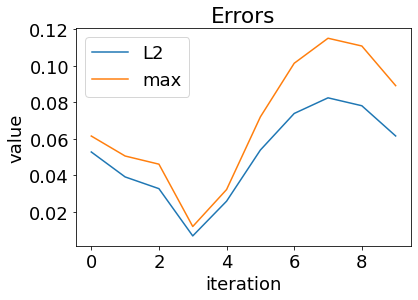

In [49]:
L2_errors = []
max_errors = []

R = 1
equationParameterA = Constant(1)

T = 2.0
timeGridSteps = 10
timeStep = T / timeGridSteps

domain = Circle(Point(0, 0), R)
mesh = generate_mesh(domain, 50)
V = FunctionSpace(mesh, 'P', 2)

r = Expression("sqrt(x[0] * x[0] + x[1] * x[1])", degree = 2)
phi = Expression("atan2(x[1], x[0])", degree = 2)

t = 0
givenFunction = Expression("pow(r,4)*sin(3*phi)*cos(2*t)", t = t, r = r, phi = phi, degree = 2)
f = Expression("-2*pow(r,4)*sin(3*phi)*sin(2*t)-equationParameterA*16*r*r*sin(3*phi)*cos(2*t)+equationParameterA*9*pow(r,4)*sin(3*phi)*cos(2*t)", t = t, r = r, phi = phi, equationParameterA = equationParameterA, degree = 2)
h = Expression("sin(3*phi)*cos(2*t)", t = t, phi = phi, degree = 2)
g = Expression("4*sin(3*phi)*cos(2*t)", t = t, phi = phi, degree = 2)

givenFunctions = [Expression("pow(r,4)*sin(3*phi)*cos(2*t)", t = t, r = r, phi = phi, degree = 2)]

discreteU = interpolate(h, V)
FEMSolutions = [discreteU.copy()]

for n in range(timeGridSteps):
    t += timeStep
    givenFunction.t = t
    f.t = t
    h.t = t
    g.t = t

    u = solutionAndErrors(V, givenFunction, 1.0 / (timeStep * equationParameterA), discreteU / (timeStep * equationParameterA) + f / equationParameterA, h, g)  
    discreteU.assign(u)
    FEMSolutions.append(discreteU.copy())
    givenFunctions.append(Expression("pow(r,4)*sin(3*phi)*cos(2*t)", t = t, r = r, phi = phi, degree = 2)) 

    L2_errors.append(errornorm(givenFunction, u, 'L2'))
    vertex_values_givenFunction = givenFunction.compute_vertex_values(mesh)
    vertex_values_u = u.compute_vertex_values(mesh)
    error_max = np.max(np.abs(vertex_values_givenFunction - vertex_values_u))
    max_errors.append(error_max)

# Graph for FEM solution
max = 0
min = 100

for i, u in enumerate(FEMSolutions): 
        n = mesh.num_vertices()
        d = mesh.geometry().dim()
        mesh_coordinates = mesh.coordinates().reshape((n, d))
        zfaces = np.asarray([u(cell.midpoint()) for cell in cells(mesh)])
        
        minimum = np.amin(zfaces)
        maximum = np.amax(zfaces)
        if (minimum < min):
            min = minimum
        if (maximum > max):
            max = maximum

for i in range(timeGridSteps):
    timeVisualization(mesh, i, FEMSolutions[i], min, max, True)

with imageio.get_writer("FEM_3.gif", mode = 'i', duration = 0.3) as writer:
    for i in range(timeGridSteps):
        image = imageio.imread(f"{i}.png")
        writer.append_data(image)

# Graph for given function        
max = 0
min = 100

for i, u in enumerate(givenFunctions): 
        n = mesh.num_vertices()
        d = mesh.geometry().dim()
        mesh_coordinates = mesh.coordinates().reshape((n, d))
        zfaces = np.asarray([u(cell.midpoint()) for cell in cells(mesh)])
        
        minimum = np.amin(zfaces)
        maximum = np.amax(zfaces)
        if (minimum < min):
            min = minimum
        if (maximum > max):
            max = maximum       

for i in range(timeGridSteps):
    timeVisualization(mesh, i, givenFunctions[i], min, max, True)

with imageio.get_writer("Given_3.gif", mode = 'i', duration = 0.3) as writer:
    for i in range(timeGridSteps):
        image = imageio.imread(f"{i}.png")
        writer.append_data(image)

# Error graphs
plt.title("Errors")
plt.plot(L2_errors, label='L2')
plt.plot(max_errors, label='max')
plt.xlabel("iteration")
plt.ylabel("value")
plt.legend()